In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter("ignore")
from sklearn import tree

pd.set_option('display.max_columns', None)


/var/folders/s5/1g0mg8_55rd1syjdkz3c2_gh0000gn/T/ipykernel_86526/2959768489.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Merging multiple CSVs into one data frame

In [2]:
#import necessary dataframe and merge 
result_df = pd.read_csv('results.csv')
stats_df = pd.read_csv('status.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
constructor_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')

In [3]:
stats_df

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


In [4]:
# merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)


In [5]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality_x,url_y,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [6]:
# Checking for no missing values 
df.isna().sum() 

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
url_x                0
fp1_date             0
fp1_time             0
fp2_date             0
fp2_time             0
fp3_date             0
fp3_time             0
quali_date           0
quali_time           0
sprint_date          0
sprint_time          0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_y                0
driverStand

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3537627.0,12630.091396,8209.508032,1.0,5125.0,11763.0,21140.0,26085.0
raceId_x,3537627.0,517.066570,331.536193,1.0,234.0,467.0,856.0,1110.0
driverId,3537627.0,204.182795,265.852299,1.0,20.0,105.0,229.0,858.0
constructorId,3537627.0,39.412151,56.860468,1.0,6.0,16.0,37.0,214.0
grid,3537627.0,9.763203,6.557031,0.0,4.0,9.0,15.0,34.0
positionOrder,3537627.0,11.229562,7.378775,1.0,5.0,10.0,17.0,39.0
points_x,3537627.0,2.998598,5.334331,0.0,0.0,0.0,4.0,50.0
laps,3537627.0,48.362040,25.123229,0.0,32.0,55.0,67.0,200.0
statusId,3537627.0,13.238133,22.544512,1.0,1.0,5.0,12.0,141.0
year,3537627.0,1996.431836,17.335956,1950.0,1984.0,1998.0,2011.0,2023.0


In [8]:
# Renaming columns
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,laps,time_x,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,year,round,circuitId,grand_prix,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,driver_num,driver_code,forename,surname,dob,nationality,url_y,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [9]:
# Dropping unwanted columns 
df = df.drop(columns=['url_y', 'url_x', 'position_x', 'fastestLapTime', 'positionText_x', 'time_x', 
                      'driverRef', 'constructorRef', 'nationality_y', 'positionText_y', 'raceId_y', 'points_y'])

In [10]:
# Changing the names of variables 
# Drop status because all drivers finished in this filtered data set 
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,time_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,company,url,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished


# Data and Column Filtering

In [11]:
# if we only want to get the current year 
df = df[df['year'] == 2023]

In [12]:
#more variables to drop 
df = df.drop(columns=['round','circuitId','grand_prix','time_y',
                      'fp1_date','fp1_time','fp2_time','fp2_date','fp3_date','fp3_time',
                      'quali_date','quali_time','sprint_date','sprint_time','url'])

In [13]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

#dropping surname and forename
df = df.drop(columns=['forename','surname'])

In [14]:
#convert date of birth into age 
from datetime import datetime
df['dob'] = pd.to_datetime(df['dob'])

# creating driver's age as new column
dates = datetime.today()-df['dob']
age = dates.dt.days/365

df['age'] = round(age)

df = df.drop(columns=['driver_num','dob','statusId'])



In [15]:
df['status'].value_counts()

status
Finished            25939
+1 Lap               4642
Collision damage      724
+2 Laps               640
Engine                528
Accident              398
Collision             390
Power loss            227
Brakes                166
Mechanical            123
Oil leak              123
Overheating            34
Electrical             12
Retired                12
Name: count, dtype: int64

In [16]:
# seperating categorical and numerical columns

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)
df.dtypes

resultId                   int64
racerId                    int64
driverId                   int64
constructorId              int64
number                    object
grid                       int64
positionOrder              int64
points                   float64
laps                       int64
timetaken_in_millisec     object
fastestLap                object
rank                      object
max_speed                 object
year                       int64
date                      object
driver_code               object
nationality               object
driverStandingsId          int64
position                   int64
wins                       int64
company                   object
status                    object
driver_name               object
age                      float64
dtype: object

In [17]:
#check for missing values
df.isnull().sum()
df.isnull().sum() / len(df) * 100 #calculate the percentage of missing values per column 

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
year                     0.0
date                     0.0
driver_code              0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins                     0.0
company                  0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,33958.0,25965.003210,70.170954,25846.0,25906.0,25967.0,26028.0,26085.0
racerId,33958.0,1104.151923,3.905883,1098.0,1101.0,1105.0,1108.0,1110.0
driverId,33958.0,627.568879,356.457389,1.0,807.0,822.0,840.0,858.0
constructorId,33958.0,103.171270,80.734435,1.0,9.0,117.0,210.0,214.0
grid,33958.0,8.284999,5.502774,0.0,4.0,8.0,13.0,20.0
positionOrder,33958.0,8.736940,5.760515,1.0,4.0,7.0,13.0,20.0
points,33958.0,7.307085,7.861551,0.0,0.0,6.0,13.0,26.0
laps,33958.0,57.788592,13.788036,0.0,51.0,57.0,70.0,78.0
year,33958.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
driverStandingsId,33958.0,65662.800518,14067.919603,1.0,67461.0,69253.0,70653.0,72187.0


Finding other ways to filter the dataset. Ages under the mean since we are focusing on the Modern Era of F1

In [19]:
#numerical data check for outliers 
num_df = df[num]

In [20]:
# Show the skew for each variable
num_df.skew()

resultId            -0.013905
racerId             -0.079137
driverId            -1.180312
constructorId        0.081488
grid                 0.357460
positionOrder        0.425311
points               0.795840
laps                -1.400925
year                 0.000000
driverStandingsId   -3.624157
position             0.406364
wins                 3.468208
age                  0.219757
dtype: float64

In [21]:
# outlier removal 

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


#num_df = num_df[(num_df >= lower_bound) & (num_df <= upper_bound)]



## Correlation Matrix

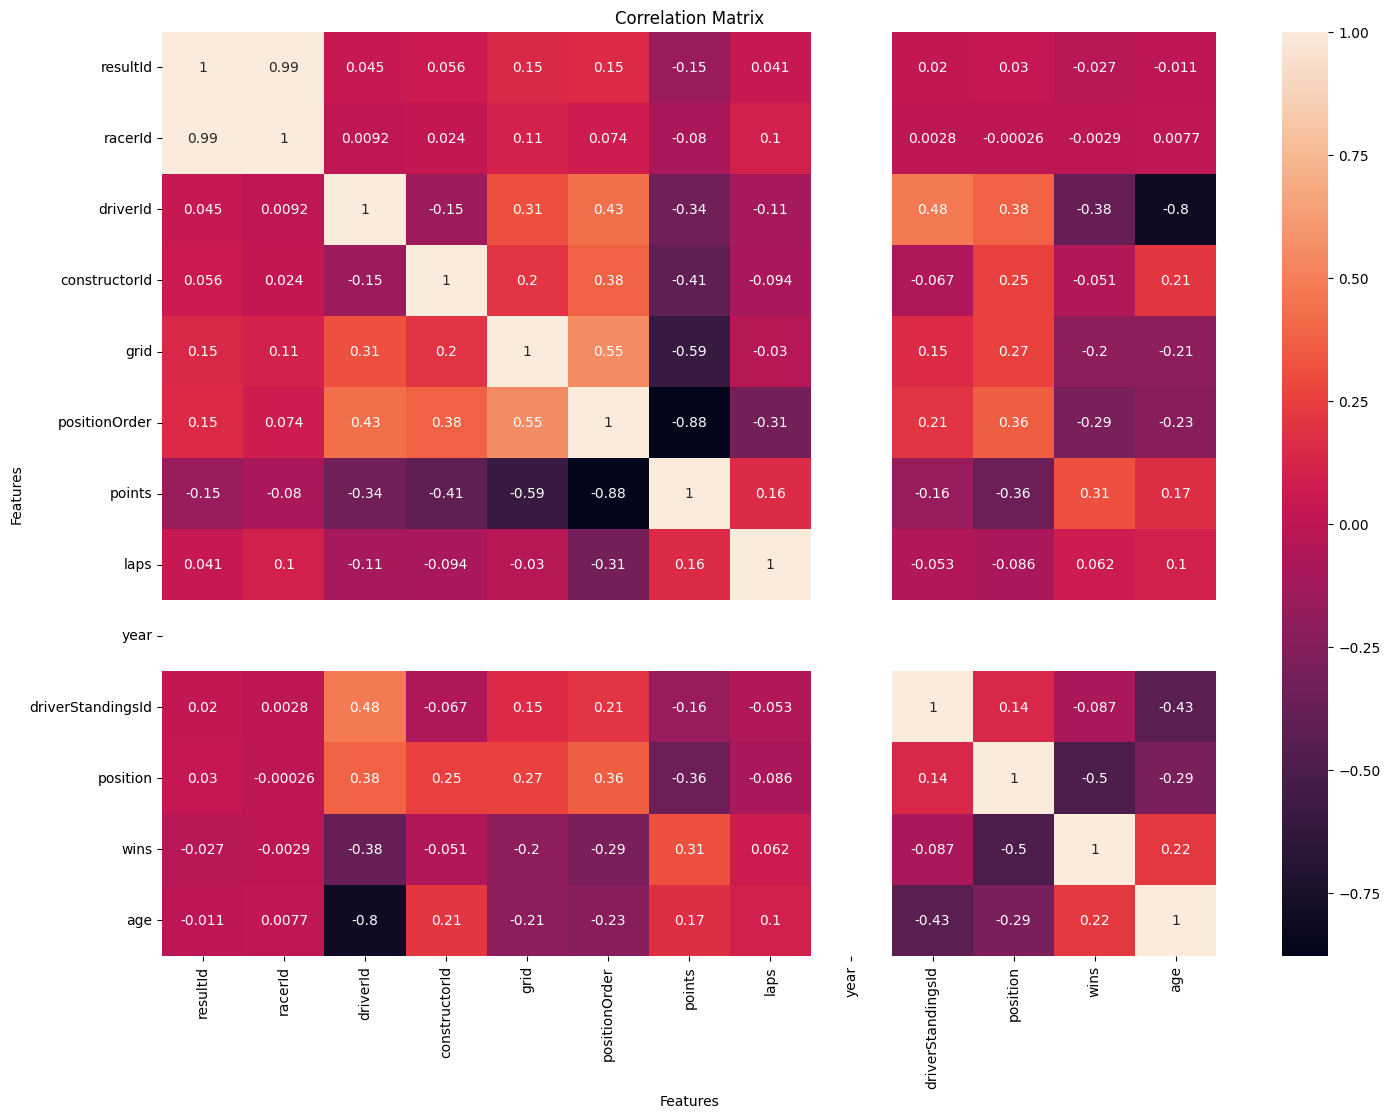

In [22]:
# heatmap

plt.figure(figsize=(17,12))
sns.heatmap(num_df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

## Further Filtering

In [23]:
# Remove \N values
df.replace('\\N', pd.NA, inplace=True)

# Remove rows with any NaN values
df = df.dropna()

cat_df = df[cat]
cat_df.replace('\\N', pd.NA, inplace=True)
cat_df = cat_df.dropna()


## Encoding Categorical Data

In [24]:
cat_df 
#the categorical values that need to be encoded, driver_code,nationality,company,status,driver_name

,number,timetaken_in_millisec,fastestLap,rank,max_speed,date,driver_code,nationality,company,status,driver_name
3503669,1,5636736,44,6,202.452,2023-03-05,VER,Dutch,Red Bull,Finished,Max Verstappen
3503670,1,5636736,44,6,202.452,2023-03-05,VER,Dutch,Red Bull,Finished,Max Verstappen
3503671,1,5636736,44,6,202.452,2023-03-05,VER,Dutch,Red Bull,Finished,Max Verstappen
3503672,1,5636736,44,6,202.452,2023-03-05,VER,Dutch,Red Bull,Finished,Max Verstappen
3503673,1,5636736,44,6,202.452,2023-03-05,VER,Dutch,Red Bull,Finished,Max Verstappen
...,...,...,...,...,...,...,...,...,...,...,...
3537435,27,5060900,26,4,229.415,2023-07-30,HUL,German,Haas F1 Team,Finished,Nico Hülkenberg
3537436,27,5060900,26,4,229.415,2023-07-30,HUL,German,Haas F1 Team,Finished,Nico Hülkenberg
3537437,27,5060900,26,4,229.415,2023-07-30,HUL,German,Haas F1 Team,Finished,Nico Hülkenberg
3537438,27,5060900,26,4,229.415,2023-07-30,HUL,German,Haas F1 Team,Finished,Nico Hülkenberg


In [25]:
#dropping number, driver_cde, nationality, and company because that can be a dead giveaway of who the driver is
cat_df = cat_df.drop(columns=['number','driver_code','nationality','company','status'])

In [26]:
#encoding categorical variables
label_encoder = LabelEncoder()

cat_df['driver_name'] = label_encoder.fit_transform(cat_df['driver_name'])

In [27]:
new_df =  pd.concat([cat_df, num_df], axis=1)
new_df

,timetaken_in_millisec,fastestLap,rank,max_speed,date,driver_name,resultId,racerId,driverId,constructorId,grid,positionOrder,points,laps,year,driverStandingsId,position,wins,age
3503669,5636736,44,6,202.452,2023-03-05,13.0,25846,1098,830,9,1,1,25.0,57,2023,68160,5,0,27.0
3503670,5636736,44,6,202.452,2023-03-05,13.0,25846,1098,830,9,1,1,25.0,57,2023,67196,13,0,27.0
3503671,5636736,44,6,202.452,2023-03-05,13.0,25846,1098,830,9,1,1,25.0,57,2023,67070,10,0,27.0
3503672,5636736,44,6,202.452,2023-03-05,13.0,25846,1098,830,9,1,1,25.0,57,2023,67091,11,0,27.0
3503673,5636736,44,6,202.452,2023-03-05,13.0,25846,1098,830,9,1,1,25.0,57,2023,67112,11,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537622,NaN,NaN,NaN,NaN,NaN,NaN,26085,1110,857,1,5,20,0.0,0,2023,72085,14,0,23.0
3537623,NaN,NaN,NaN,NaN,NaN,NaN,26085,1110,857,1,5,20,0.0,0,2023,72125,14,0,23.0
3537624,NaN,NaN,NaN,NaN,NaN,NaN,26085,1110,857,1,5,20,0.0,0,2023,72145,11,0,23.0
3537625,NaN,NaN,NaN,NaN,NaN,NaN,26085,1110,857,1,5,20,0.0,0,2023,72165,11,0,23.0


In [28]:
cat_df

,timetaken_in_millisec,fastestLap,rank,max_speed,date,driver_name
3503669,5636736,44,6,202.452,2023-03-05,13
3503670,5636736,44,6,202.452,2023-03-05,13
3503671,5636736,44,6,202.452,2023-03-05,13
3503672,5636736,44,6,202.452,2023-03-05,13
3503673,5636736,44,6,202.452,2023-03-05,13
...,...,...,...,...,...,...
3537435,5060900,26,4,229.415,2023-07-30,14
3537436,5060900,26,4,229.415,2023-07-30,14
3537437,5060900,26,4,229.415,2023-07-30,14
3537438,5060900,26,4,229.415,2023-07-30,14


In [29]:
cat_df = cat_df.drop(columns=['date'])
num_df = num_df.drop(columns=['year'])

## Statistical Test

Text(0, 0.5, 'P-value')

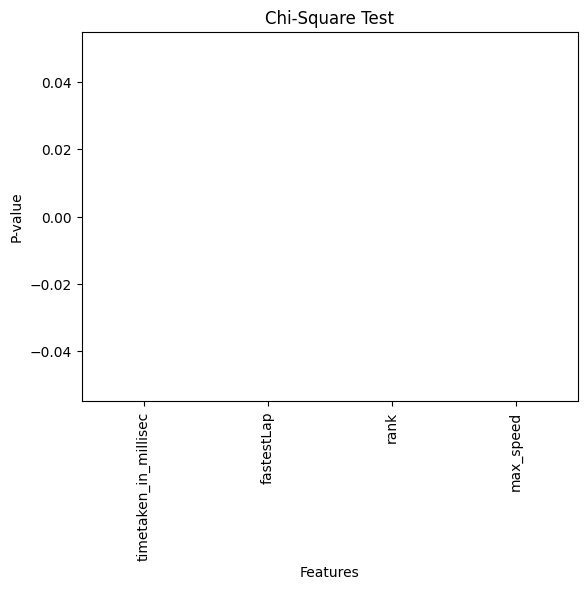

In [30]:
from sklearn.feature_selection import chi2


X = cat_df.drop('driver_name',axis=1)
y = cat_df['driver_name']

chi_scores = chi2(X,y)

chi_scores

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)


p_values.plot.bar()
plt.title('Chi-Square Test')
plt.xlabel("Features")
plt.ylabel('P-value')

In [31]:
from scipy.stats import chi2_contingency

# Create an empty dictionary to store chi-squared test results
chi2_results = {}

# Perform chi-squared test for each categorical variable
for column in cat_df.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(cat_df[column], df['driver_name'])
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi2_results[column] = {'Chi-Squared': chi2, 'p-value': p, 'Degrees of Freedom': dof}

# Print the results
for column, result in chi2_results.items():
    print(f"Chi-Squared Test for {column}:")
    print(f"Chi-Squared Value: {result['Chi-Squared']}")
    print(f"P-value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print("")

Chi-Squared Test for timetaken_in_millisec:
Chi-Squared Value: 518780.0
P-value: 0.0
Degrees of Freedom: 3240

Chi-Squared Test for fastestLap:
Chi-Squared Value: 111256.59996830704
P-value: 0.0
Degrees of Freedom: 780

Chi-Squared Test for rank:
Chi-Squared Value: 66654.9105752128
P-value: 0.0
Degrees of Freedom: 360

Chi-Squared Test for max_speed:
Chi-Squared Value: 516110.73626306833
P-value: 0.0
Degrees of Freedom: 3220

Chi-Squared Test for driver_name:
Chi-Squared Value: 518780.0
P-value: 0.0
Degrees of Freedom: 400



## Summary of Chi-Squared Test
As we can see, with such low P-values, it's possible to see how such a correlation between driver_name and these different features exists. The high Chi-Squared Values also signify correlation. These high values often indicate that there may be some form of dependency or correlation between the featues and target variable.

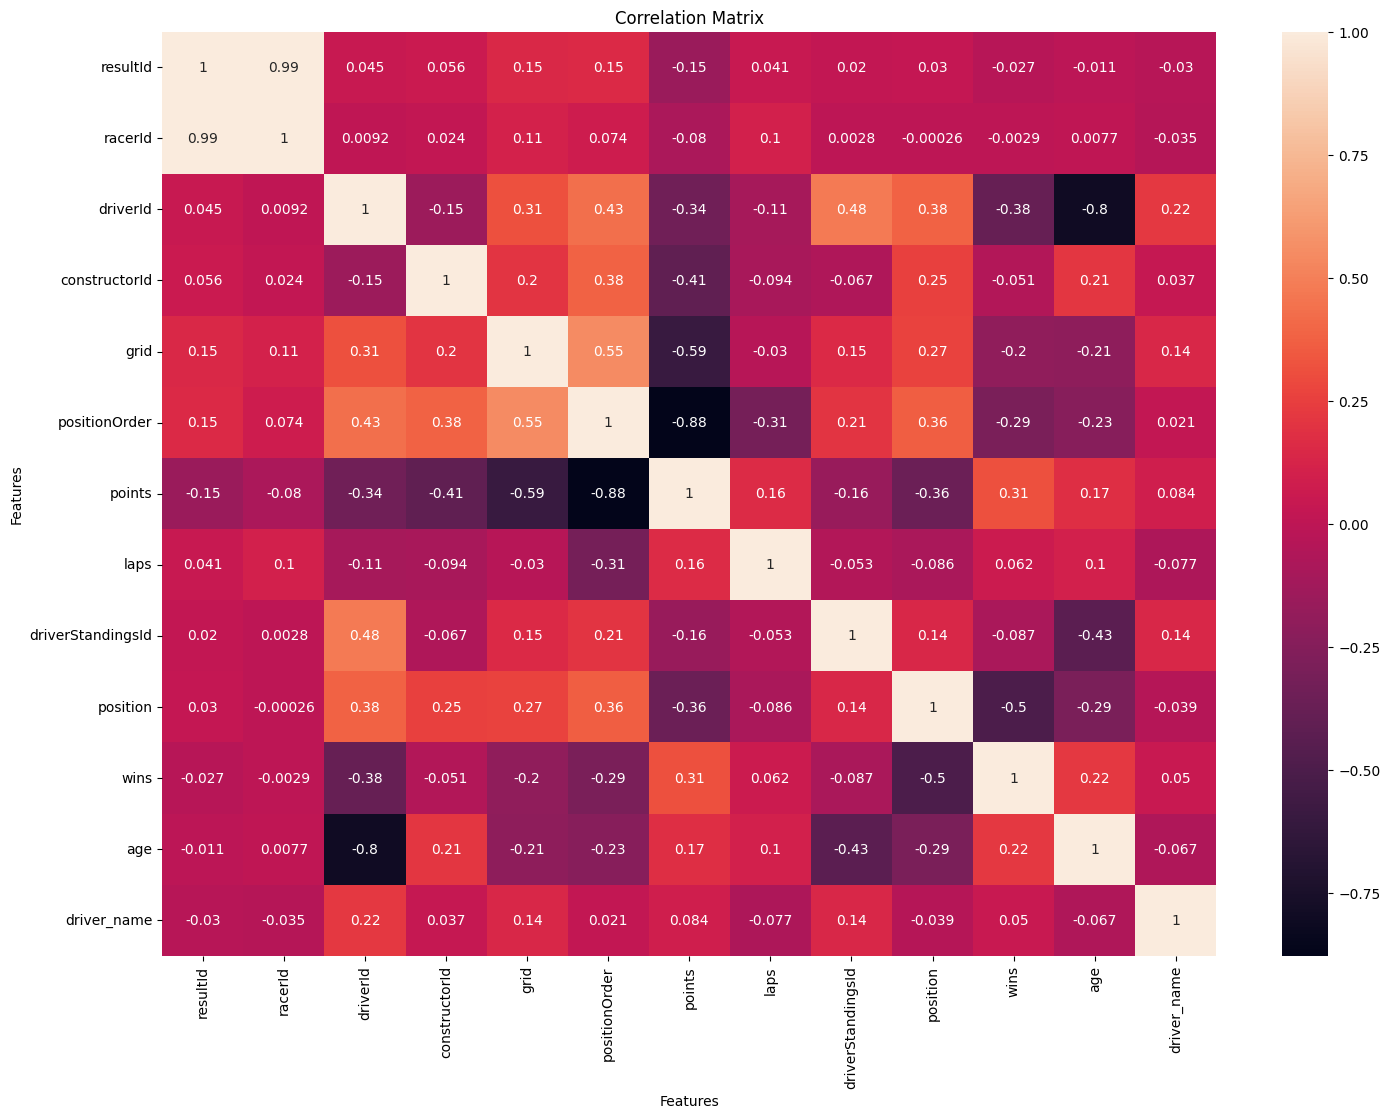

In [32]:
new_df = pd.concat([num_df, cat_df['driver_name']], axis=1)
# heatmap

plt.figure(figsize=(17,12))
sns.heatmap(new_df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

## Summary of Correlation Matrix
The numerical features we will be using to predict the driver name will be max_speed, wins, points, and grid. All of the categorical features have a significant p-value score so I will be using those as well. For example, wins demonstrates a reasonable correlation with an r value of 0.05. Points also demonstrates a fair correlation with points, with an r value of 0.08. Although some features like driverid on paper have a strong correlation with driver_name, this wouldn't help much as every driver is assigned with their unique driverid. We took it important to consider features that have strong correlations with driver_name yet are not directly associated or may have confounding variables. 

In [33]:
# Define the features used for our models
#feature_df = df[df['wins','points','grid','timetaken_in_millisec','fastest_lap','rank','max_speed']]
features_df = df[['wins','points','grid','timetaken_in_millisec','fastestLap','max_speed','driver_name']]
features_df

,wins,points,grid,timetaken_in_millisec,fastestLap,max_speed,driver_name
3503669,0,25.0,1,5636736,44,202.452,Max Verstappen
3503670,0,25.0,1,5636736,44,202.452,Max Verstappen
3503671,0,25.0,1,5636736,44,202.452,Max Verstappen
3503672,0,25.0,1,5636736,44,202.452,Max Verstappen
3503673,0,25.0,1,5636736,44,202.452,Max Verstappen
...,...,...,...,...,...,...,...
3537435,0,0.0,0,5060900,26,229.415,Nico Hülkenberg
3537436,0,0.0,0,5060900,26,229.415,Nico Hülkenberg
3537437,0,0.0,0,5060900,26,229.415,Nico Hülkenberg
3537438,0,0.0,0,5060900,26,229.415,Nico Hülkenberg


## SVM Model

In [34]:
#predict the winner of the race 
X = features_df.drop(columns=('driver_name'))
y = features_df.driver_name

In [35]:
X

,wins,points,grid,timetaken_in_millisec,fastestLap,max_speed
3503669,0,25.0,1,5636736,44,202.452
3503670,0,25.0,1,5636736,44,202.452
3503671,0,25.0,1,5636736,44,202.452
3503672,0,25.0,1,5636736,44,202.452
3503673,0,25.0,1,5636736,44,202.452
...,...,...,...,...,...,...
3537435,0,0.0,0,5060900,26,229.415
3537436,0,0.0,0,5060900,26,229.415
3537437,0,0.0,0,5060900,26,229.415
3537438,0,0.0,0,5060900,26,229.415


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
X_train

,wins,points,grid,timetaken_in_millisec,fastestLap,max_speed
3513644,0,5.0,11,5636676,51,209.062
3514050,0,0.0,16,5652165,51,204.164
3511304,1,0.0,5,9164965,53,236.131
3507813,0,8.0,4,4910770,50,239.451
3518549,8,13.0,5,6571042,33,158.799
...,...,...,...,...,...,...
3531677,1,26.0,2,5888634,53,195.910
3510287,0,11.0,0,9161691,53,236.814
3504529,0,12.0,4,5684788,37,200.588
3524055,5,15.0,3,5642946,47,208.228


In [38]:
from sklearn.preprocessing import LabelEncoder

#encode categorical information 
label_encoder = LabelEncoder()
for i in cat:
    df[i] = label_encoder.fit_transform(df[i])

In [39]:
#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) #scale the training data

In [40]:
#initialize the classifier

svm = SVC() #the default kernel is rbf
svm.fit(X_train, y_train) #fit the data


SVC()

In [41]:
#encode & scale the new/test data

#use fit_transform 
#Fits the scaler to the data and then transforms it
#Use this when you have your data and want to perform both fitting and transformation in one go.

X_test = scaler.fit_transform(X_test) #scale the test data

#predict the labels for the test set
y_pred   = svm.predict(X_test)

print('The predicted Outcome is: {}'.format(y_pred))

The predicted Outcome is: ['Valtteri Bottas' 'Max Verstappen' 'Fernando Alonso' ... 'Sergio Pérez'
 'Fernando Alonso' 'Lewis Hamilton']


In [42]:
#evaluate the prediction accuracy
print('The accuracy of the test model is: {}'.format(svm.score(X_test, y_test)))
print('The accuracy of the train model : {}'.format(svm.score(X_train, y_train)))

The accuracy of the test model is: 0.9381906964790542
The accuracy of the train model : 0.9405188081731564


In [43]:
#setup the parameter grid to try values of c ranging from 1 to 10, and values for gamma ranging from 1 to 5.
params = {'C': np.arange(1,20,5), #intervals of 5 
         'gamma': np.arange(1, 5),
         'kernel': ('linear', 'rbf')}

svm = SVC()

#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5,return_train_score = True)
svm_grid.fit(X_train, y_train)

#evaluate the best parameters
print("The best parameters were "+ str(svm_grid.best_params_)) #print the best parameters
print("Thes best score was " + str(svm_grid.best_score_))  #print the best score

The best parameters were {'C': 1, 'gamma': 3, 'kernel': 'rbf'}
Thes best score was 1.0


In [44]:
# Turn the cross validation results in a data frame
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
13,0.625424,0.004293,0.130761,0.001167,6,3,rbf,"{'C': 6, 'gamma': 3, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25,0.589054,0.020593,0.148648,0.003274,16,1,rbf,"{'C': 16, 'gamma': 1, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
29,0.598986,0.002435,0.124106,0.003364,16,3,rbf,"{'C': 16, 'gamma': 3, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.761576,0.021538,0.246289,0.015013,1,3,rbf,"{'C': 1, 'gamma': 3, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
21,0.616725,0.010937,0.125941,0.002260,11,3,rbf,"{'C': 11, 'gamma': 3, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
19,0.654262,0.005741,0.160320,0.006403,11,2,rbf,"{'C': 11, 'gamma': 2, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
27,0.643312,0.021798,0.155490,0.011297,16,2,rbf,"{'C': 16, 'gamma': 2, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.595956,0.013864,0.175668,0.014333,6,1,rbf,"{'C': 6, 'gamma': 1, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
17,0.615514,0.019407,0.162208,0.007063,11,1,rbf,"{'C': 11, 'gamma': 1, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
11,0.653417,0.018648,0.163277,0.007497,6,2,rbf,"{'C': 6, 'gamma': 2, 'kernel': 'rbf'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [45]:
# look accruacy train score, train hihg, test low equals overfitting 
#both numbers low = underfitting 
# classification report 

cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score','std_train_score','mean_test_score', 'std_test_score']]

,mean_train_score,std_train_score,mean_test_score,std_test_score
13,1.000000,0.000000,1.000000,0.000000
25,1.000000,0.000000,1.000000,0.000000
29,1.000000,0.000000,1.000000,0.000000
5,1.000000,0.000000,1.000000,0.000000
21,1.000000,0.000000,1.000000,0.000000
19,1.000000,0.000000,1.000000,0.000000
27,1.000000,0.000000,1.000000,0.000000
9,1.000000,0.000000,1.000000,0.000000
17,1.000000,0.000000,1.000000,0.000000
11,1.000000,0.000000,1.000000,0.000000


In [46]:
#get the classification report post EDA
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Alexander Albon       0.98      0.71      0.83       157
    Carlos Sainz       0.87      0.99      0.93       566
 Charles Leclerc       1.00      0.85      0.92       362
Daniel Ricciardo       1.00      1.00      1.00        67
    Esteban Ocon       0.85      1.00      0.92       248
 Fernando Alonso       0.94      0.99      0.97      1310
  George Russell       1.00      0.70      0.82       310
     Guanyu Zhou       1.00      0.12      0.22        57
 Kevin Magnussen       0.95      1.00      0.98       206
    Lance Stroll       1.00      1.00      1.00       367
    Lando Norris       0.87      0.89      0.88       263
  Lewis Hamilton       0.95      0.97      0.96      1168
  Logan Sargeant       1.00      0.40      0.57        10
  Max Verstappen       1.00      1.00      1.00       609
 Nico Hülkenberg       0.94      1.00      0.97       358
   Nyck de Vries       0.00      0.00      0.00        16
   Oscar Pias

# Decision Tree

In [47]:
clf = DecisionTreeClassifier(max_depth=5,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [48]:
tree.export_text(clf)

'|--- feature_1 <= 1.15\n|   |--- feature_1 <= -0.66\n|   |   |--- feature_5 <= -0.99\n|   |   |   |--- feature_1 <= -0.85\n|   |   |   |   |--- class: Fernando Alonso\n|   |   |   |--- feature_1 >  -0.85\n|   |   |   |   |--- class: Carlos Sainz\n|   |   |--- feature_5 >  -0.99\n|   |   |   |--- feature_1 <= -1.05\n|   |   |   |   |--- feature_5 <= 0.79\n|   |   |   |   |   |--- class: Valtteri Bottas\n|   |   |   |   |--- feature_5 >  0.79\n|   |   |   |   |   |--- class: Nico Hülkenberg\n|   |   |   |--- feature_1 >  -1.05\n|   |   |   |   |--- feature_2 <= -0.34\n|   |   |   |   |   |--- class: Lewis Hamilton\n|   |   |   |   |--- feature_2 >  -0.34\n|   |   |   |   |   |--- class: Esteban Ocon\n|   |--- feature_1 >  -0.66\n|   |   |--- feature_0 <= 0.26\n|   |   |   |--- feature_2 <= 0.64\n|   |   |   |   |--- feature_2 <= -1.12\n|   |   |   |   |   |--- class: Sergio Pérez\n|   |   |   |   |--- feature_2 >  -1.12\n|   |   |   |   |   |--- class: Fernando Alonso\n|   |   |   |--- 

In [49]:
# plotting decision tree workflow 
dec_tree = list(X.columns)


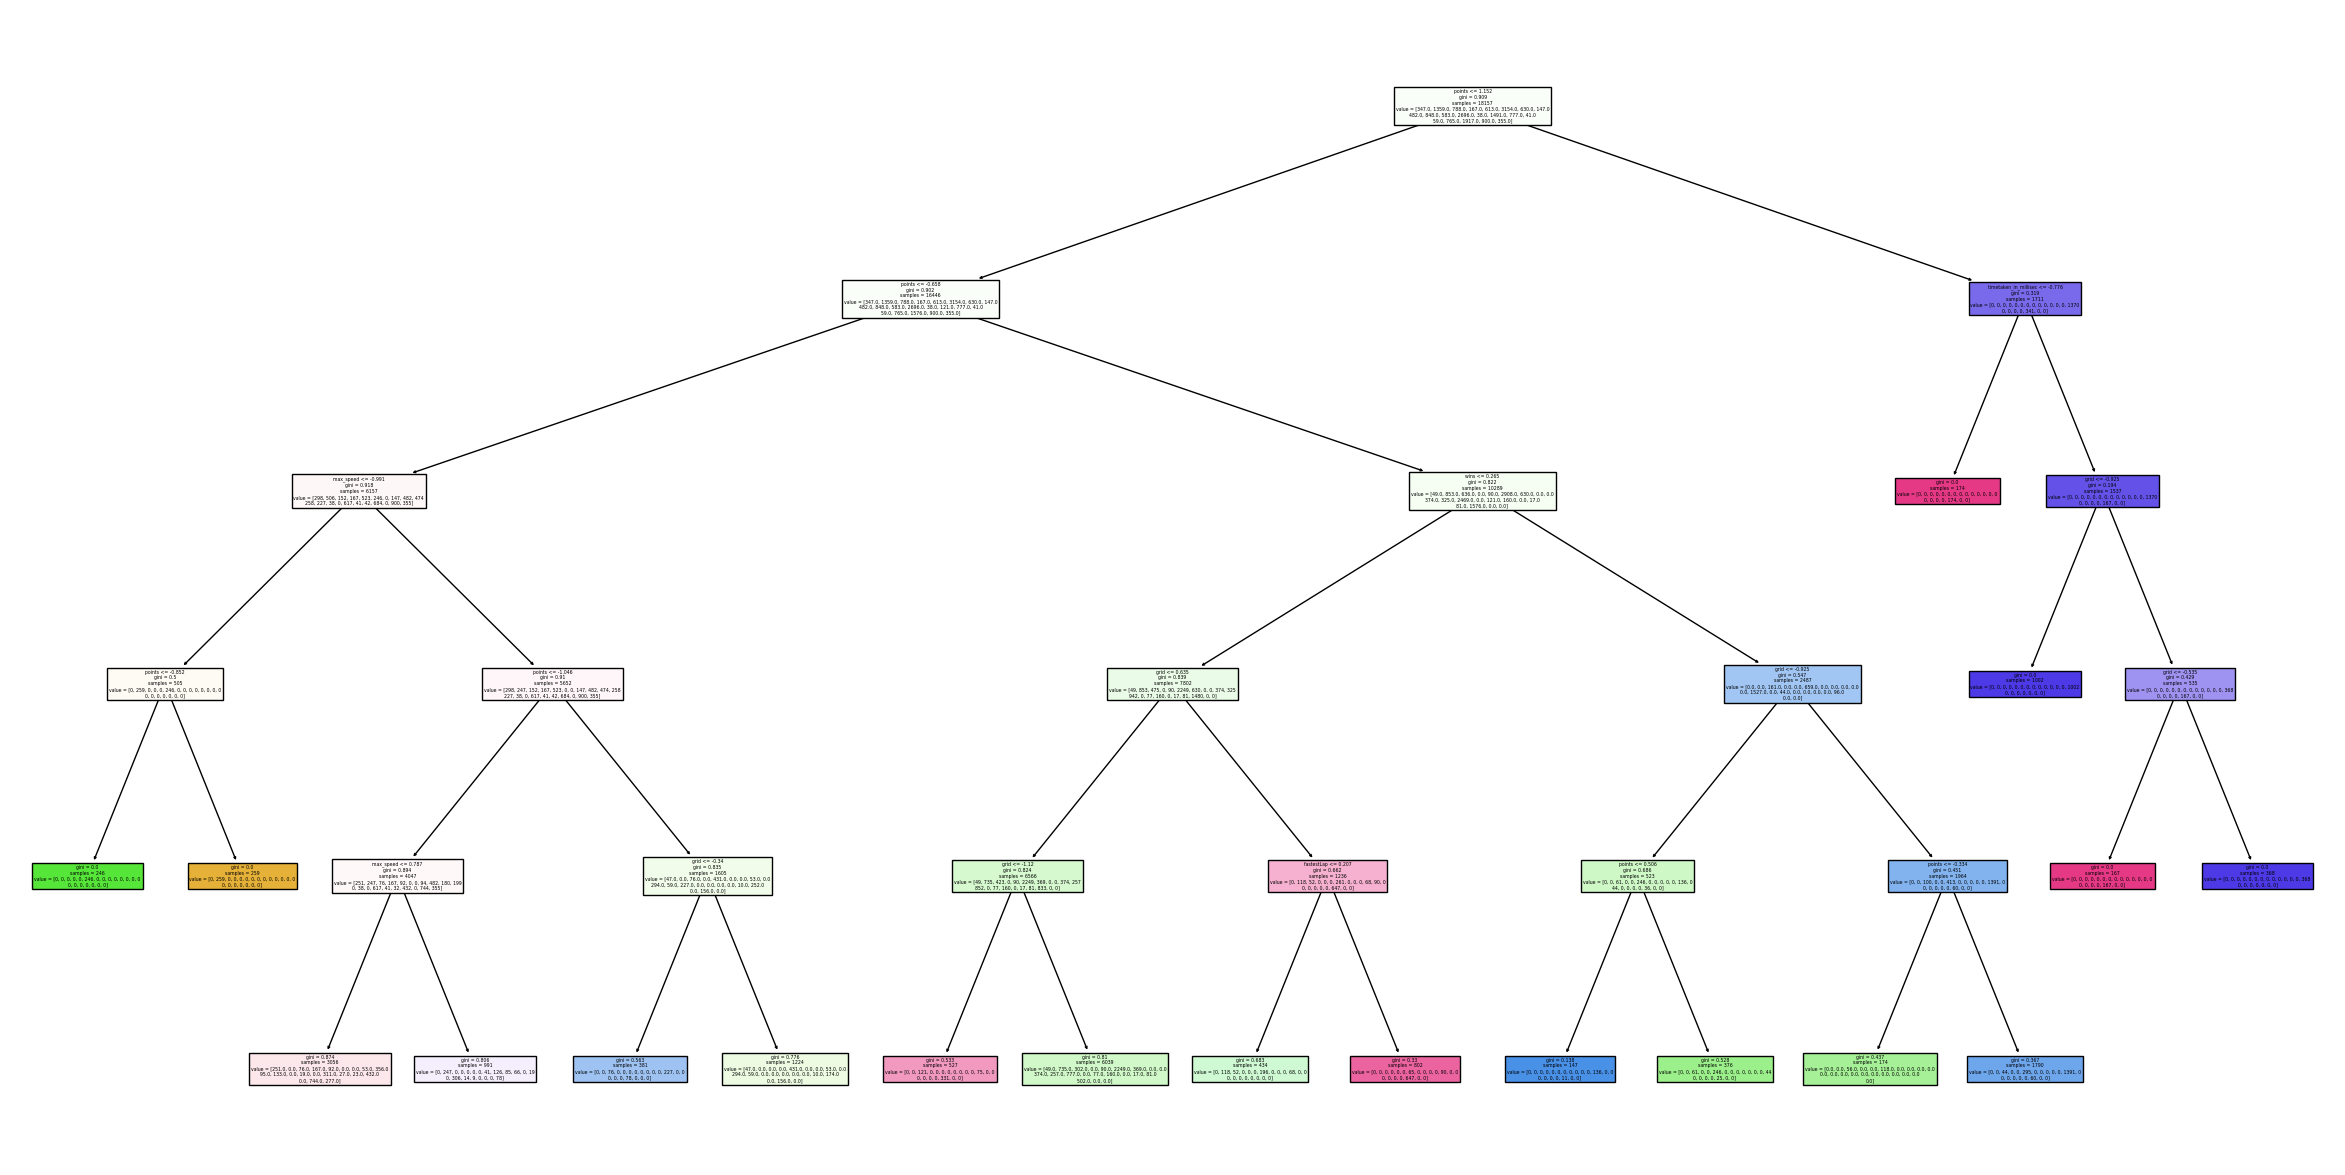

In [50]:
# plotting decision tree workflow 
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(clf,
               feature_names=dec_tree,
               filled=True)

Our tree classifies driver_name based on 5 different features, the features we include for all our models. This output graph shows how having less points changes the decision boundary compared to having higher points. Also, things like max_speed. Our decision tree allows for us to understand the intuition of the decision tree without having to come up with it ourselves. This is much easier to understand compared to the KNN model.

In [51]:
# Randomforest
# K-neighbors


# Random Forest Classification

In [52]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('The Predicted Tip Amount is: {}'.format(y_pred))

Accuracy: 0.9992289899768697
The Predicted Tip Amount is: ['Valtteri Bottas' 'Max Verstappen' 'Lando Norris' ... 'Sergio Pérez'
 'Fernando Alonso' 'Lewis Hamilton']


With such a high accuracy, it's also possible to understand that this model is not overfitting as the accuracy isn't 100% perfect.

In [54]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31d302050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31d53c9d0>})

In [55]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 497}


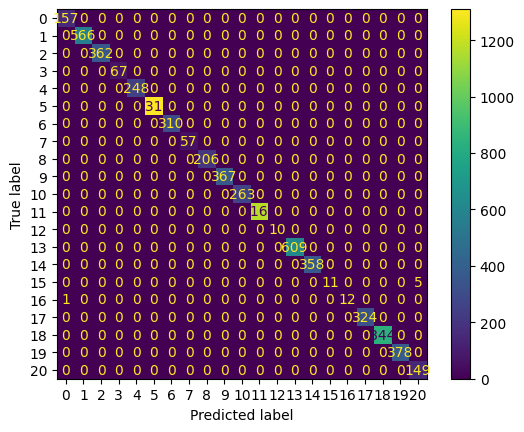

In [56]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# KNN (K-Nearest Neighbors)

In [57]:
#set KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#target is multiclass so we need to use an average metric for precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9993574916473914
Precision: 0.9993585094262564
Recall: 0.9993574916473914


<Axes: title={'center': 'Importance for each feature included in model'}, xlabel='Features', ylabel='Importance'>

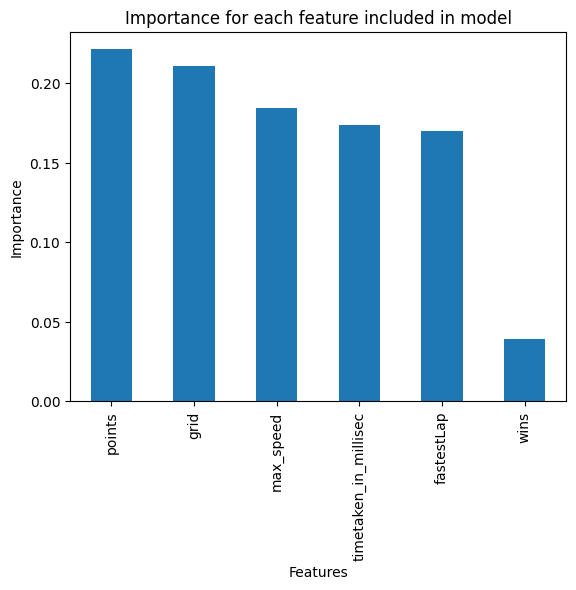

In [58]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Importance for each feature included in model")
feature_importances.plot.bar()

As we can see here, points has the highest importance for the model while wins has the lowest importance. This is crucial in understanding how the model judges our drivers. It also allows us to fine tune our data and model to emphasis important features such as points and grid.

In [59]:
#identify a suitable value of k, using a range of 20 
predictions = {}

for k in range(3, 50, 2): #increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)

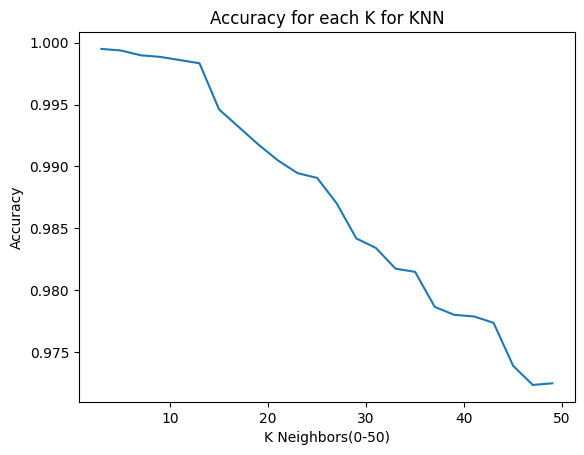

In [60]:
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.xlabel("K Neighbors(0-50)")
plt.ylabel("Accuracy")
plt.title("Accuracy for each K for KNN")
plt.show()

Overall, there is an inverse linear relationship between accuracy and how many neighbors we involved in the KNN. We will choose to do a model of 25 KNN, which is roughly in the middle of accuracies we found. It has an accuracy of around .985, which is quite good and reasonable for prediction.

In [61]:
#get the classification report for the best value of k
knn_25 = KNeighborsClassifier(n_neighbors = 25) #initialize the classifier and set the number of neighbors
knn_25.fit(X_train, y_train)
y_pred = knn_25.predict(X_test)

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Alexander Albon       0.97      1.00      0.98       157
    Carlos Sainz       1.00      0.99      0.99       566
 Charles Leclerc       0.99      0.96      0.98       362
Daniel Ricciardo       1.00      1.00      1.00        67
    Esteban Ocon       1.00      0.97      0.99       248
 Fernando Alonso       0.99      0.99      0.99      1310
  George Russell       1.00      1.00      1.00       310
     Guanyu Zhou       0.97      1.00      0.98        57
 Kevin Magnussen       1.00      1.00      1.00       206
    Lance Stroll       1.00      1.00      1.00       367
    Lando Norris       0.99      1.00      0.99       263
  Lewis Hamilton       0.96      1.00      0.98      1168
  Logan Sargeant       0.00      0.00      0.00        10
  Max Verstappen       1.00      0.97      0.99       609
 Nico Hülkenberg       1.00      1.00      1.00       358
   Nyck de Vries       1.00      1.00      1.00        16
   Oscar Pias

## Summary
As we compare the three different ML models that we used, SVM, Random Forest Classifier, and KNN, we can notice strengths of some models over others. More specifically, our Decision Tree chose with the highest accuracy, with an accuracy of .999 while our SVM had the lowest accuracy of around .94. Our KNN model varied depending on how many neighbors we chose to involve, ranging from accuracies of almost 1 to as low as .975, overall solid numbers. It's important to involve multiple models, as we did to predict one target as it allows us to both fine tune and also adjust our predictions. If one model isn't as accurate, we can tune it to match the accuracy of our other models.